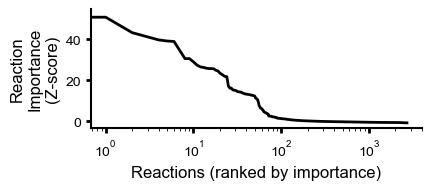

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Set font style
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

# Load and plot data
sorted_data = pd.read_csv('fig2d.csv')
fig, ax = plt.subplots(figsize=(4.42, 2.01))
ax.plot(range(len(sorted_data)), sorted_data['Z_score'], lw=2, color='black')

# Configure axis labels and style
ax.set_xlabel('Reactions (ranked by importance)', fontsize=12)
ax.set_ylabel('Reaction\nImportance\n(Z-score)', fontsize=12)
ax.xaxis.set_tick_params(width=2, labelsize=10)
ax.yaxis.set_tick_params(width=2, labelsize=10)

# Configure plot style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.set_xscale('log')

fig.tight_layout()
plt.show()

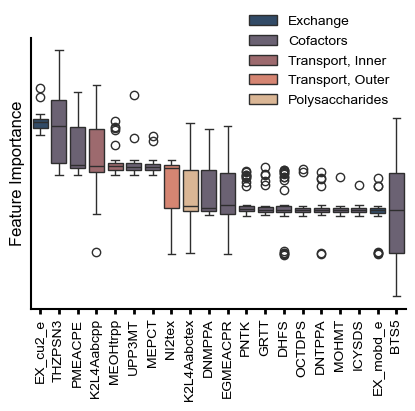

In [3]:
# Import custom colormaps module and access lipari colormap
import colormaps as cmaps
cmaps.lipari

# Get top 20 reactions from sorted data
top = sorted_data.head(20)

# Melt the dataframe to convert importance columns into rows
# This creates a long format where each importance score is on a separate row
df_melted = pd.melt(top, id_vars=['Feature', 'system'], 
                    value_vars=[col for col in top.columns if col.startswith('Importance_')],
                    var_name='Importance_Index', value_name='Importance')

# Create shortened subsystem names for better readability in plot legend
shorter_subsystems = []
for i in range(len(df_melted)):
    # Map long subsystem names to shorter versions
    if df_melted['system'][i] == 'Extracellular exchange':
        shorter_subsystems.append('Exchange')
    elif df_melted['system'][i] == 'Transport, Inner Membrane':
        shorter_subsystems.append('Transport, Inner')
    elif df_melted['system'][i] == 'Transport, Outer Membrane Porin':
        shorter_subsystems.append('Transport, Outer')
    elif df_melted['system'][i] == 'Cofactor and Prosthetic Group Biosynthesis':
        shorter_subsystems.append('Cofactors')
    elif df_melted['system'][i] == 'Lipopolysaccharide Biosynthesis / Recycling':
        shorter_subsystems.append('Polysaccharides')
    else: shorter_subsystems.append(df_melted['system'][i])

# Add shortened subsystem names as new column
df_melted['shorter_subsystem'] = shorter_subsystems

# Create figure and axis with specified size
fig, ax= plt.subplots(figsize=(4.33, 4.08))

# Create boxplot showing importance distribution for each feature, colored by subsystem
sns.boxplot(data=df_melted, x='Feature', y='Importance', hue='shorter_subsystem', ax=ax, palette='lipari')

# Configure axis appearance
ax.set_yticks([])  # Remove y-axis ticks
ax.yaxis.set_tick_params(width=0, labelsize=10)
ax.xaxis.set_tick_params(width=2, labelsize=10, rotation=90)  # Rotate x labels 90 degrees
ax.set_ylabel('Feature Importance', fontsize=12)
ax.set_xlabel('', fontsize=12)

# Configure plot borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Configure legend appearance and position
legend = ax.legend(fontsize=10, alignment='left', bbox_to_anchor=(0.55, 0.7))
legend.get_frame().set_facecolor('none')  # Transparent legend background
legend.get_frame().set_linewidth(0.0)  # Remove legend border

# Adjust layout to prevent overlapping
fig.tight_layout()